<a href="https://colab.research.google.com/github/shubham62025865/shubham1/blob/main/Regression_error_metric___Bias_and_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression error metric

<img width = 600 src = https://timeseriesreasoning.files.wordpress.com/2021/06/ee96d-1uoglr9t-6_1hilphu2d_rg.png />

Here is the documentation link of all available error metrics in sklearn - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

## What is a Regression Problem

Regression is a type of Machine learning which helps in finding the relationship between independent and dependent variable.

In simple words, Regression can be defined as a Machine learning problem where we have to predict discrete values like price, Rating, Fees, etc.

## Why We require Evaluation Metrics?

Machine learning model cannot have 100 per cent efficiency otherwise the model is known as a biased model. which further includes the concept of overfitting and underfitting.

It is necessary to obtain the accuracy on training data, But it is also important to get a genuine and approximate result on unseen data otherwise Model is of no use.

So to build and deploy a generalized model we require to Evaluate the model on different metrics which helps us to better optimize the performance, fine-tune it, and obtain a better result.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

Dataset link - https://www.kaggle.com/datasets/tanuprabhu/linear-regression-dataset

In [ ]:
df = pd.read_csv("/content/Linear Regression - Sheet1.csv")
df

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


<Axes: xlabel='X', ylabel='Y'>

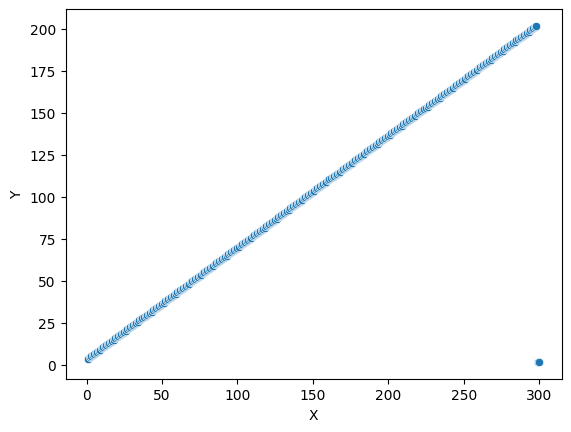

In [ ]:
sns.scatterplot(data = df, x="X", y="Y")

In [ ]:
X = df.drop(columns = ["Y"])
y = df["Y"]
X.shape, y.shape

((300, 1), (300,))

In [ ]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

# Defining the model
lr = LinearRegression()

# Fitting the model
lr.fit(X_train,y_train)

# Getting predictions on X_test
y_pred = lr.predict(X_test)
# print(y_pred)

In [ ]:
X_train.head()

,X
65,66
179,180
142,143
31,32
216,217


## 1. Mean Absolute Error(MAE)

doc link - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html


MAE is a very simple metric which calculates the absolute difference between actual and predicted values.

To better understand, let’s take an example you have input data and output data and use Linear Regression, which draws a best-fit line.

Now you have to find the MAE of your model which is basically a mistake made by the model known as an error. Now find the difference between the actual value and predicted value that is an absolute error but we have to find the mean absolute of the complete dataset.

so, sum all the errors and divide them by a total number of observations And this is MAE. And we aim to get a minimum MAE because this is a loss.


<img width = 600 src = https://miro.medium.com/max/1400/1*O1e79fdHpZCX6AIHDHob1Q.jpeg />

<img width = 400 src = https://editor.analyticsvidhya.com/uploads/71890MAE%20Formula.png />


**Advantages of MAE**

- The MAE you get is in the same unit as the output variable.
- It is most Robust to outliers.

**Disadvantages of MAE**

- The graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable.

In [ ]:
# creating error_df for comparing different error metric
d = {'metric': [], 'value': []}
error_df = pd.DataFrame(data = d)
error_df

,metric,value


In [ ]:
from sklearn.metrics import mean_absolute_error
d = {'metric': ["MAE"],
     'value': [mean_absolute_error(y_test,y_pred)]}
temp_df = pd.DataFrame(data = d)
error_df = pd.concat([error_df,temp_df],ignore_index = True)
error_df

,metric,value
0,MAE,4.581576


## 2. Mean Squared Error(MSE)

doc link - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

MSE is a most used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference between actual and predicted value.

So, above we are finding the absolute difference and here we are finding the squared difference.

What actually the MSE represents? It represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.

<img width = 500 src = https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1600368657769-5BJU5FK86VZ6UXZGRC1M/Mean+Squared+Error.png /> 
<img width = 400 src = https://suboptimal.wiki/images/mse_5.jpg />

**Advantages of MSE**

- The graph of MSE is differentiable, so you can easily use it as a loss function.

**Disadvantages of MSE**

- The value you get after calculating MSE is a squared unit of output. for example, the output variable is in meter(m) then after calculating MSE the output we get is in meter squared.
- If you have outliers in the dataset then it penalizes the outliers most and the calculated MSE is bigger. So, in short, It is not Robust to outliers which were an advantage in MAE.

In [ ]:
from sklearn.metrics import mean_squared_error

d = {'metric': ["MSE"],
     'value': [mean_squared_error(y_test,y_pred)]}
temp_df = pd.DataFrame(data = d)
error_df = pd.concat([error_df,temp_df],ignore_index = True)
error_df

,metric,value
0,MAE,4.581576
1,MSE,651.751075


In [ ]:
df1 = pd.DataFrame()
df1

""


In [ ]:
df1["y_test"] = y_test.reset_index(drop =True)
df1["y_pred"] = y_pred
df1.head()

,y_test,y_pred
0,125.888889,124.495961
1,39.888889,40.624660
2,77.888889,77.684072
3,127.888889,126.446456
4,20.555556,21.769871


In [ ]:
df1["y_test-y_pred"] = df1["y_test"] - df1["y_pred"]
df1.head()

,y_test,y_pred,y_test-y_pred
0,125.888889,124.495961,1.392928
1,39.888889,40.624660,-0.735771
2,77.888889,77.684072,0.204817
3,127.888889,126.446456,1.442433
4,20.555556,21.769871,-1.214315


In [ ]:
df1["abs_error"] = abs(df1["y_test-y_pred"])
df1.head()

,y_test,y_pred,y_test-y_pred,abs_error
0,125.888889,124.495961,1.392928,1.392928
1,39.888889,40.624660,-0.735771,0.735771
2,77.888889,77.684072,0.204817,0.204817
3,127.888889,126.446456,1.442433,1.442433
4,20.555556,21.769871,-1.214315,1.214315


In [ ]:
df1["abs_error"].mean()

4.581576030794952

In [ ]:
df1["sq_error"] = (df1["y_test-y_pred"])**2
df1.head()

,y_test,y_pred,y_test-y_pred,abs_error,sq_error
0,125.888889,124.495961,1.392928,1.392928,1.940249
1,39.888889,40.624660,-0.735771,0.735771,0.541359
2,77.888889,77.684072,0.204817,0.204817,0.041950
3,127.888889,126.446456,1.442433,1.442433,2.080612
4,20.555556,21.769871,-1.214315,1.214315,1.474562


In [ ]:
np.sqrt(df1["sq_error"].mean())

25.529415883514865

## 3. Root Mean Squared Error(RMSE)

As RMSE is clear by the name itself, that it is a simple square root of mean squared error.


<img width = 600 src = https://community.qlik.com/legacyfs/online/128958_2016-06-23%2013_45_36-Root%20Mean%20Squared%20Error%20_%20Kaggle.png />

**Advantages of RMSE**
 - The output value you get is in the same unit as the required output variable which makes interpretation of loss easy.

**Disadvantages of RMSE**
- It is not that robust to outliers as compared to MAE.
- for performing RMSE we have to use NumPy square root function over MSE.

Most of the time people use RMSE as an evaluation metric and mostly when you are working with deep learning techniques the most preferred metric is RMSE.

In [ ]:
d = {'metric': ["RMSE"],
     'value': [np.sqrt(mean_squared_error(y_test,y_pred))]}
temp_df = pd.DataFrame(data = d)
error_df = pd.concat([error_df,temp_df],ignore_index = True)
error_df

,metric,value
0,MAE,4.581576
1,MSE,651.751075
2,RMSE,25.529416


## 4. R Squared (R2)

doc link - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score

R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.

In contrast, MAE and MSE depend on the context as we have seen whereas the R2 score is independent of context.

So, with help of R squared we have a baseline model to compare a model which none of the other metrics provides. The same we have in classification problems which we call a threshold which is fixed at 0.5. So basically R2 squared calculates how must regression line is better than a mean line.

Hence, R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit.



<img width = 500 src= https://miro.medium.com/max/720/1*Ug7uflGlIAjFe6lFMACnfA.png />

<img width = 500 src= https://vitalflux.com/wp-content/uploads/2019/07/R-squared-formula-linear-regression-model.jpg />
<img width = 400 src = https://vitalflux.com/wp-content/uploads/2019/07/R-squared-formula-function-of-SSE-and-SST.jpg />

<img width = 400 src= https://i.ytimg.com/vi/deIQeQzPK08/maxresdefault.jpg />

**Total Sum of Squares**

Total variation in target variable is the sum of squares of the difference between the actual values and their mean.

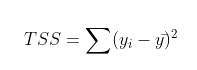

TSS or Total sum of squares gives the total variation in Y. We can see that it is very similar to the variance of Y. While the variance is the average of the squared sums of difference between actual values and data points, TSS is the total of the squared sums.

Now that we know the total variation in the target variable, how do we determine the proportion of this variation explained by our model? We go back to RSS.


**Residual Sum of Squares**

As we discussed before, RSS gives us the total square of the distance of actual points from the regression line. But if we focus on a single residual, we can say that it is the distance that is not captured by the regression line. Therefore, RSS as a whole gives us the variation in the target variable that is not explained by our model.

**Calculate R-Squared**

Now, if TSS gives us the total variation in Y, and RSS gives us the variation in Y not explained by X, then TSS-RSS gives us the variation in Y that is explained by our model! We can simply divide this value by TSS to get the proportion of variation in Y that is explained by the model. And this our R-squared statistic!

R-squared = (TSS-RSS)/TSS

                    = Explained variation/ Total variation

                    = 1 – Unexplained variation/ Total variation

So R-squared gives the degree of variability in the target variable that is explained by the model or the independent variables. If this value is 0.7, then it means that the independent variables explain 70% of the variation in the target variable.

R-squared value always lies between 0 and 1. A higher R-squared value indicates a higher amount of variability being explained by our model and vice-versa.

If we had a really low RSS value, it would mean that the regression line was very close to the actual points. This means the independent variables explain the majority of variation in the target variable. In such a case, we would have a really high R-squared value.


<img width = 400 src = https://cdn.analyticsvidhya.com/wp-content/uploads/2020/07/R2-decrease.png />


On the contrary, if we had a really high RSS value, it would mean that the regression line was far away from the actual points. Thus, independent variables fail to explain the majority of variation in the target variable. This would give us a really low R-squared value.


<img width  = 400 src = https://cdn.analyticsvidhya.com/wp-content/uploads/2020/07/R2-increase.png />

So, this explains why the R-squared value gives us the variation in the target variable given by the variation in independent variables.

**Problems with R-squared statistic**

The R-squared statistic isn’t perfect. In fact, it suffers from a major flaw. Its value never decreases no matter the number of variables we add to our regression model. That is, even if we are adding redundant variables to the data, the value of R-squared does not decrease. It either remains the same or increases with the addition of new independent variables. This clearly does not make sense because some of the independent variables might not be useful in determining the target variable. Adjusted R-squared deals with this issue.

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)

d = {'metric': ["R2"],
     'value': [r2]}
temp_df = pd.DataFrame(data = d)
error_df = pd.concat([error_df,temp_df],ignore_index = True)
error_df

,metric,value
0,MAE,4.581576
1,MSE,651.751075
2,RMSE,25.529416
3,R2,0.792923


## 5. Adjusted R Squared

The Adjusted R-squared takes into account the number of independent variables used for predicting the target variable. In doing so, we can determine whether adding new variables to the model actually increases the model fit.

Let’s have a look at the formula for adjusted R-squared to better understand its working.

<img width = 500 src= https://cdn.analyticsvidhya.com/wp-content/uploads/2020/07/edit.png />


Here,

- n represents the number of data points in our dataset
- k represents the number of independent variables, and
- R represents the R-squared values determined by the model.

So, if R-squared does not increase significantly on the addition of a new independent variable, then the value of Adjusted R-squared will actually decrease.

<img width = 500 src= https://cdn.analyticsvidhya.com/wp-content/uploads/2020/07/edit1.png />


On the other hand, if on adding the new independent variable we see a significant increase in R-squared value, then the Adjusted R-squared value will also increase.


<img width = 500 src= https://cdn.analyticsvidhya.com/wp-content/uploads/2020/07/edit2.png />


Clearly, it is better to use Adjusted R-squared when there are multiple variables in the regression model. This would allow us to compare models with differing numbers of independent variables.


In [ ]:
X_train.shape[1]

1

In [ ]:
n=X_train.shape[0]
k=X_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))

d = {'metric': ["adj R2"],
     'value': [adj_r2_score]}
temp_df = pd.DataFrame(data = d)
error_df = pd.concat([error_df,temp_df],ignore_index = True)
error_df

,metric,value
0,MAE,4.581576
1,MSE,651.751075
2,RMSE,25.529416
3,R2,0.792923
4,adj R2,0.792053


<img width = 400 src = https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG />

## Bias-Variance Tradeoff

***Machine Learning is not a pursuit of perfection (i.e. zero error), but it is about seeking the best tradeoff.***

First, when you receive your data, divide it into three parts.

1. **Training set**: The training set is typically 60% of the data. As the name suggests, this is used for training a machine learning model.

2. **Validation set**: The validation is also called the the development set. This is typically 20% of the data. This set is not used during training. It is used to test the quality of the trained model. Errors on the validation set are used to guide the choice of model (e.g. what value of n to use in our polynomial model). Even though this set is not used for training, the fact it was used for model selection makes it a bad choice for reporting the final accuracy of the model.

3. **Test set**: This set is typically 20% of the data. Its only purpose is to report the accuracy of the final model.

In Machine Learning, the errors made by your model is the sum of three kinds of errors — error due to bias in your model, error due to model variance and finally error that is irreducible. The following equation summarizes the sources of errors.

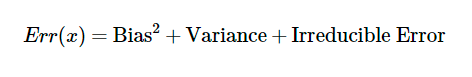

Even if you had a perfect model, you might not be able to remove the errors made by a learning algorithm completely. This is because the training data itself may contain noise. This error is called Irreducible error or Bayes’ error rate or the Optimum Error rate. While you cannot do anything about the Optimum Error Rate, you can reduce the errors due to bias and variance

## What is bias?

Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

## What is variance?

Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.

<img src = https://miro.medium.com/max/4800/1*JzqZ0OtLqKFzsAVWYP-DBg.png />

If your machine learning model is not performing well, it is usually a high bias or a high variance problem. The figure below graphically shows the effect of model complexity on error due to bias and variance.

<img width = 400 src = http://www.luigifreda.com/wp-content/uploads/2017/03/Bias-Variance-Tradeoff-660x445.png />


The region on the left, where both training and validation errors are high, is the region of high bias. On the other hand, the region on the right where validation error is high, but training error is low is the region of high variance. We want to be in the sweet spot in the middle.

## How to detect a high bias problem?
A high bias problem has the following characteristics

- High training error.
- Validation error is similar in magnitude to the training error.

## How to detect a high variance problem?
A high variance problem on the other hand has the following characteristics

- Low training error
- Very high Validation error

<img width = 400 src = https://learnopencv.com/wp-content/uploads/2017/02/Machine-Learning-Workflow.png />

## How to fix a high bias problem?
The following tricks are employed to fix a high bias problem.

1. Train longer: Many machine learning algorithms are set up as iterative optimization problems where the training error ( or a function of the training error ) is minimized. Just letting the algorithm run for more hours or days can help reduce the bias. In Neural Networks, you can change a parameter called the “learning rate” which will help the training error go down faster.


2. **Train a more complex model**: A more complex model will fit the training data better. In case of linear regression we could increase the degree of the polynomial to get a more complex model. In the case of Neural Networks, one can add more layers. Finally, in the case of an SVM, you can use a non-linear SVMs instead of a linear one.

3. **Obtain more features**: Sometimes you just do not have enough information to train a model. For example, if you are trying to train a model that can predict the gender of a person based on the color of their hair, the problem might be impossible to solve. But if you add a new feature — the length of the hair — the problem becomes more tractable.

4. **Decrease regularization**: If we try to fit a polynomial to data. In this naive implementation the parameters a_0, ..., a_n could take any values. This makes the model very flexible. However, we may want to constrain the flexibility of the model to prevent overfitting. So usually a regularization term ( \lambda ( a^2_0 + ... + a^2_n) ) is added to the cost function we are trying to minimize. But in this case, we do not have an overfitting problem. We have an under-fitting problem, and we can reduce it by reducing the value of \lambda.

5. **New model architecture**: This is just another way of saying that if nothing works, start over.

## How to fix a high variance problem?
After you have addressed the high bias problem, you need to check if you have a high variance issue.

In this situation, your model is complex enough that it overfits your data. The following tricks should be employed to deal with overfitting.

1. **Obtain more data**: Because the validation error is large, it means that the training set and the validation set that were randomly chosen from the same dataset, somehow have different characteristics. This usually means that you do not have enough data and you need to collect more.

2. **Decrease number of features**: Sometimes collecting more data is not an option. In that case, you can reduce the number of features. You may have to remove features manually. For example, in our previous example of identifying the gender of a person based on hair color and hair length, you may decide to drop hair color and keep hair length.

3. **Increase regularization**: When we have a high variance problem the model is fitting the training data. In fact, the model is probably fitting even the noise in training set and therefore not performing as well on the validation set. We can reduce the flexibility of the model by using regularization that puts constraints on the magnitude of the parameters. This is done by adding a regularization term to the cost function. When we are fitting a polynomial model, the regularization term is of the form \lambda ( a^2_0 + ... + a^2_n). So we are not only trying to reduce the training set error, we are also trying to make sure the magnitudes of the parameters are small, thus limiting the flexibility of the model. Increasing \lambda increases regularization.

4. **New model architecture**: Try something else. Better luck next time!

Example of polynomial function:

f(x) = 15x2 - 20x + 19

In [ ]:
X = np.random.rand(200, 1) + 0.3

In [ ]:
X.shape

(200, 1)

In [ ]:
X.ndim

2

In [ ]:
y = 15*X**2 - 20*X + 19 + (np.random.randn(200, 1))*0.5
y.shape

(200, 1)

In [ ]:
poly_df = pd.DataFrame()
poly_df["X"] = X.flatten()
poly_df["y"] = y.flatten()
poly_df.head()

,X,y
0,0.617116,12.375714
1,0.333336,13.992115
2,1.008267,13.546728
3,1.034152,13.994883
4,0.487593,13.711171


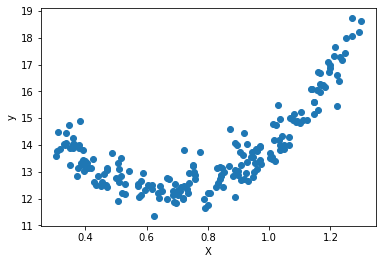

In [ ]:
plt.scatter(poly_df["X"], poly_df["y"])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
X = poly_df.drop(columns = ["y"])
y = poly_df["y"]
X.shape, y.shape

((200, 1), (200,))

In [ ]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

print(f'Shape of X_train -: {X_train.shape}')
print(f'Shape of X_valid -: {X_test.shape}')
print(f'Shape of y_train -: {y_train.shape}')
print(f'Shape of y_valid -: {y_test.shape}')

Shape of X_train -: (160, 1)
Shape of X_valid -: (40, 1)
Shape of y_train -: (160,)
Shape of y_valid -: (40,)


In [ ]:
# Defining the model
lr = LinearRegression()

# Fitting the model
lr.fit(X_train,y_train)

# Getting predictions on X_test
y_pred = lr.predict(X_test)

In [ ]:
# Calculating the r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.46764492553654025

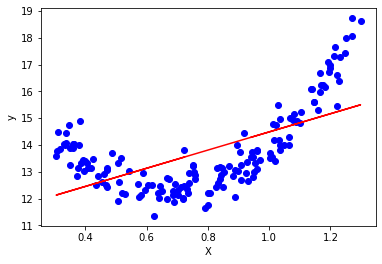

In [ ]:
plt.plot(X_train, lr.predict(X_train), c ="red")
plt.scatter(X_train,y_train, c = "blue")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# Polynomial Linear Regression of degree 2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:

X_train.head()

,X
5,0.722848
154,0.306375
173,0.686889
187,1.196729
108,0.588473


In [ ]:
pd.DataFrame(X_train_poly).head()

,0,1,2
0,1.0,0.722848,0.522509
1,1.0,0.306375,0.093865
2,1.0,0.686889,0.471816
3,1.0,1.196729,1.432160
4,1.0,0.588473,0.346300


In [ ]:
# Defining the model
poly_lr = LinearRegression()

# Fitting the model
poly_lr.fit(X_train_poly,y_train)

# Getting predictions on X_test
y_pred_poly = poly_lr.predict(X_test_poly)

In [ ]:
# Calculating the r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_poly)

0.8678636038126873

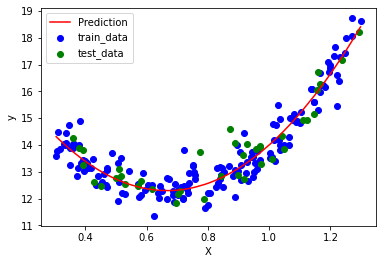

In [ ]:

d = {"X_train":X_train["X"].reset_index(drop=True), "y_train_pred_poly" : pd.Series(poly_lr.predict(X_train_poly))}
temp_df = pd.DataFrame(data = d)

sns.lineplot(data=temp_df, x="X_train", y="y_train_pred_poly", color = "red", label = "Prediction")
plt.scatter(X_train,y_train, c = "blue", label="train_data")
plt.scatter(X_test,y_test, c = "green", label="test_data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
poly_lr.predict(X_train_poly).shape

(160,)

In [ ]:
y_train.shape

(160,)

In [ ]:
def poly(degree):

  poly = PolynomialFeatures(degree=degree)

  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  # Defining the model
  poly_lr = LinearRegression()

  # Fitting the model
  poly_lr.fit(X_train_poly,y_train)

  # Getting predictions on X_test
  y_pred_poly = poly_lr.predict(X_test_poly)

  d = {"X_train":X_train["X"].reset_index(drop=True), "y_train_pred_poly" : pd.Series(poly_lr.predict(X_train_poly))}
  temp_df = pd.DataFrame(data = d)

  # plotting results
  sns.lineplot(data=temp_df, x="X_train", y="y_train_pred_poly", color = "red", label = "Prediction")
  plt.scatter(X_train,y_train, c = "blue", label="train_data")
  plt.scatter(X_test,y_test, c = "green", label="test_data")
  plt.xlabel("X")
  plt.ylabel("y")
  plt.legend()
  plt.show()  

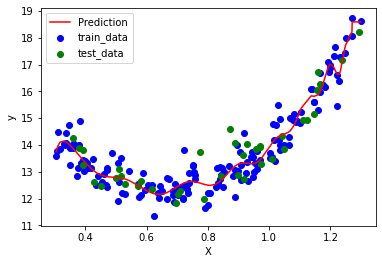

In [ ]:
poly(50)

In [ ]:
degree = np.arange(30)
degree

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
def rmse_plot(degree):

  for i in np.arange(degree):

    poly = PolynomialFeatures(degree=i)

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Defining the model
    poly_lr = LinearRegression()

    # Fitting the model
    poly_lr.fit(X_train_poly,y_train)

    # Getting predictions on X_test
    y_pred_train_poly = poly_lr.predict(X_train_poly)

    # Getting predictions on X_test
    y_pred_test_poly = poly_lr.predict(X_test_poly)

    #train mse
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_poly))

    #test mse
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))

    #appending train and test mse
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)

In [ ]:
train_rmse_list = []
test_rmse_list = []
rmse_plot(50)

In [ ]:
d = {"train_rmse" :train_rmse_list, "test_rmse" : test_rmse_list}
rmse_df = pd.DataFrame(data = d)
rmse_df.shape

(50, 2)

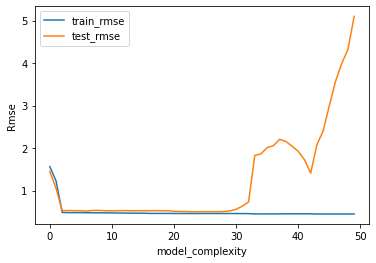

In [ ]:
sns.lineplot(data = rmse_df,x = rmse_df.index, y = "train_rmse", label = "train_rmse")
sns.lineplot(data = rmse_df,x = rmse_df.index, y = "test_rmse", label = "test_rmse")
plt.xlabel("model_complexity")
plt.ylabel("Rmse")
plt.legend()
plt.show()